In [1]:
# Prediction values for each solder type
prediction_values_305 = {
    "FCSP2": 831, "FCSP3": 628, "FCGB1": 1047,
    "FCGB2": 383, "FCGB3": 444, "VTF2": 730, "FCSP4": 676
}

prediction_values_105 = {
    "FCSP2": 672, "FCSP3": 637, "FCGB1": 821,
    "FCGB2": 422, "FCGB3": 389, "VTF2": 598, "FCSP4": 881
}

prediction_values_senju = {
    "FCSP2": 707, "FCSP3": 503, "FCGB1": 840,
    "FCGB2": 400, "FCGB3": 391, "VTF2": 676, "FCSP4": 577
}

In [2]:
import os
import pandas as pd

# Define the root directory containing the folders
root_dir = r'.\images\masked_images'


# list all masked images from every subdirectory of the root_dir
files_path = []
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        # filter files which starts from masked_
        if file.startswith('masked_'):
            file_path = os.path.join(subdir, file)
            files_path.append(file_path)
            print(file_path)
    print()


.\images\masked_images\SAC105\masked_grayscale_FCGB1_sac105_300x300.png
.\images\masked_images\SAC105\masked_grayscale_FCGB2_sac105_300x300.png
.\images\masked_images\SAC105\masked_grayscale_FCGB3_sac105_300x300.png
.\images\masked_images\SAC105\masked_grayscale_FCSP2_sac105_300x300.png
.\images\masked_images\SAC105\masked_grayscale_FCSP3_sac105_300x300.png
.\images\masked_images\SAC105\masked_grayscale_FCSP4_sac105_300x300.png
.\images\masked_images\SAC105\masked_grayscale_VTF2_sac105_300x300.png

.\images\masked_images\SAC305\masked_grayscale_FCGB1_sac305_300x300.png
.\images\masked_images\SAC305\masked_grayscale_FCGB2_sac305_300x300.png
.\images\masked_images\SAC305\masked_grayscale_FCGB3_sac305_300x300.png
.\images\masked_images\SAC305\masked_grayscale_FCSP2_sac305_300x300.png
.\images\masked_images\SAC305\masked_grayscale_FCSP3_sac305_300x300.png
.\images\masked_images\SAC305\masked_grayscale_FCSP4_sac305_300x300.png
.\images\masked_images\SAC305\masked_grayscale_VTF2_sac305_300x

In [3]:
import cv2
import numpy as np

def load_and_resize_image(image_path, target_size=(300, 300)):
    # Read the image in grayscale (0 argument to cv2.imread means grayscale)
    image = cv2.imread(image_path, 0)
    
    if image is None:
        return None  # If the image cannot be read, return None
    
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    
    # Add a channel dimension to the image (from (300, 300) to (300, 300, 1))
    image = np.expand_dims(image, axis=-1)  # Adds a new dimension at the end
    
    return image

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and resize images from subfolder
def load_and_resize_images_from_subfolder(subfolder_path, target_size=(300, 300)):
    images = []
    filenames = []
    for file in os.listdir(subfolder_path):
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(subfolder_path, file)
            # Read and resize the image
            image = cv2.imread(image_path, 0)
            image = cv2.resize(image, target_size)  # Resize to target size
            # Set all pixel values of 255 to 0
            image[image == 255] = 0
            images.append(image)
            filenames.append(file)  # Store the filename
    return images, filenames

# Define the root directory containing the folders
root_dir = r'.\images\masked_images'



# Prepare input datasets for all solder types
X_train_all = {"sac305": [], "sac105": [],  "senju": []}
Y_train_all = {"sac305": [], "sac105": [], "senju": []}
filenames_all = {"sac305": [], "sac105": [],  "senju": []}


# Iterate over each main folder in the root directory
for main_folder in os.listdir(root_dir):
    main_folder_path = os.path.join(root_dir, main_folder)
    
    if os.path.isdir(main_folder_path):
        parent_folder_name = os.path.basename(main_folder_path).lower()
        
        # Map to the corresponding prediction dictionary
        if "sac305" in parent_folder_name:
            prediction_dict = prediction_values_305
        elif "sac105" in parent_folder_name:
            prediction_dict = prediction_values_105
        elif "senju" in parent_folder_name:
            prediction_dict = prediction_values_senju
        else:
            continue  # Skip if the folder doesn't match a known type

        # Iterate over each image file in the main folder
        for filename in os.listdir(main_folder_path):
            file_path = os.path.join(main_folder_path, filename)
            
            if os.path.isfile(file_path):
                # Extract the subfolder (assuming the subfolder name is before the first underscore in the filename)
                pad_design_type = filename.split('_')[2]

                # Check if the pad_design_type is in the prediction dictionary
                if pad_design_type in prediction_dict:
                    # Load and resize the image
                    image = load_and_resize_image(file_path)  # assuming this function exists

                    if image is not None:  # Ensure there's at least one image
                        # Add image and filename to training data
                        X_train_all[parent_folder_name].append(image)
                        filenames_all[parent_folder_name].append(filename.replace('masked_grayscale_', ''))
                        Y_train_all[parent_folder_name].append(prediction_dict[pad_design_type])

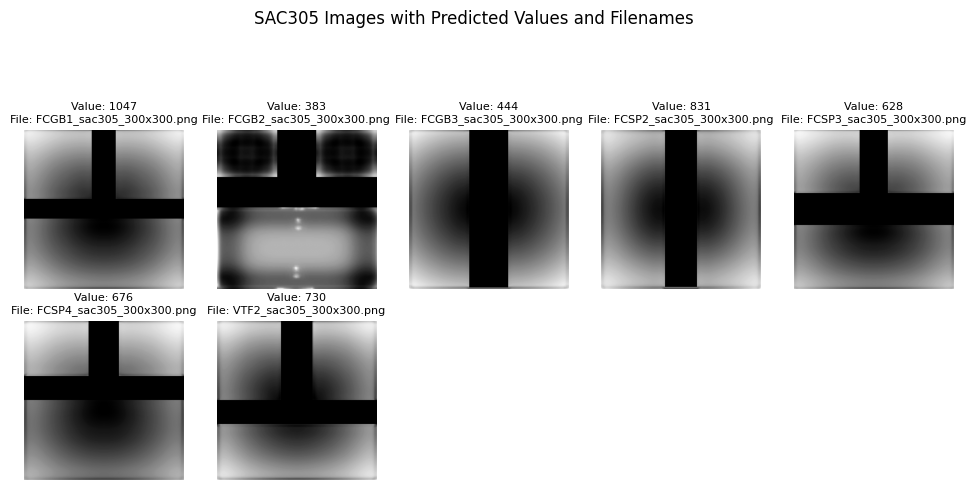

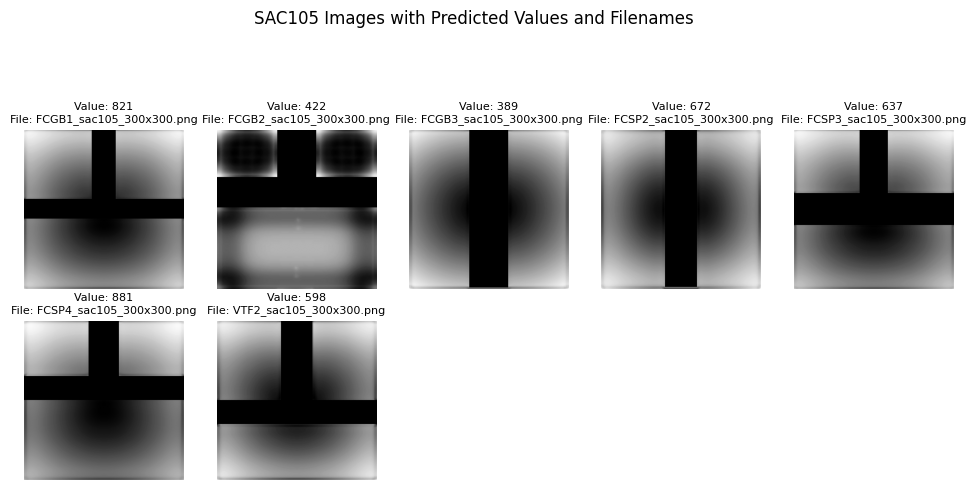

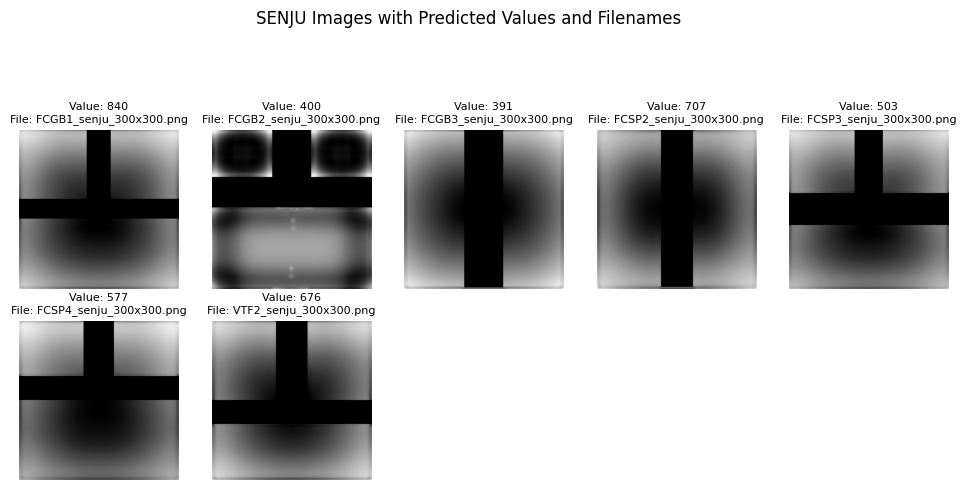

In [5]:
# Function to display images with their predicted values and filenames
def display_images_with_values_and_filenames(images, values, filenames, title):
    plt.figure(figsize=(12, 12))
    for i in range(min(len(images), 25)):  # Limit display to 25 images
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Value: {values[i]}\nFile: {filenames[i]}', fontsize=8)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


# Display images for each solder type
for solder_type in X_train_all.keys():
    if len(X_train_all[solder_type]) > 0:
        display_images_with_values_and_filenames(
            X_train_all[solder_type],
            Y_train_all[solder_type],
            filenames_all[solder_type],
            f'{solder_type.upper()} Images with Predicted Values and Filenames'
        )

In [6]:
# Convert lists to numpy arrays for all solder types
X_train_all_np = {key: np.array(value) for key, value in X_train_all.items()}
Y_train_all_np = {key: np.array(value) for key, value in Y_train_all.items()}

# Ensure the shapes match and print for each solder type
for solder_type in X_train_all_np.keys():
    print(f"Shape of X_train_{solder_type.upper()}: {X_train_all_np[solder_type].shape}")
    print(f"Shape of Y_train_{solder_type.upper()}: {Y_train_all_np[solder_type].shape}")


Shape of X_train_SAC305: (7, 300, 300, 1)
Shape of Y_train_SAC305: (7,)
Shape of X_train_SAC105: (7, 300, 300, 1)
Shape of Y_train_SAC105: (7,)
Shape of X_train_SENJU: (7, 300, 300, 1)
Shape of Y_train_SENJU: (7,)


In [7]:
# Combine X_train from all solder types
X_train_combined = np.concatenate(
    [X_train_all_np[key] for key in X_train_all_np.keys()],
    axis=0
)

# Ensure the shape of the combined dataset
print("Shape of X_train_combined:", X_train_combined.shape)

# Combine Y_train from all solder types
Y_train_combined = np.concatenate(
    [Y_train_all_np[key] for key in Y_train_all_np.keys()],
    axis=0
)

# Normalize Y_train_combined
Y_min = np.min(Y_train_combined)
Y_max = np.max(Y_train_combined)
Y_train_normalized = (Y_train_combined - Y_min) / (Y_max - Y_min)

# Ensure the shape of the combined dataset
print("Shape of Y_train_combined:", Y_train_combined.shape)
print("Shape of Y_train_normalized:", Y_train_normalized.shape)


Shape of X_train_combined: (21, 300, 300, 1)
Shape of Y_train_combined: (21,)
Shape of Y_train_normalized: (21,)


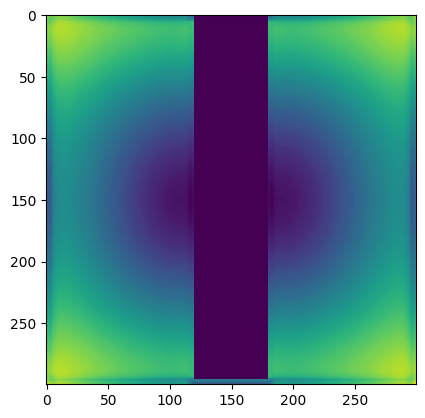

In [8]:
plt.imshow(X_train_combined[3])

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from sklearn.model_selection import LeaveOneOut


# Model 0

In [10]:
from tensorflow.keras.models import Model
import random

# Set the random seeds for reproducibility
reproducible_seed = 42
tf.random.set_seed(reproducible_seed)
np.random.seed(reproducible_seed)
random.seed(reproducible_seed)

# Function to create a model based on the given parameters
def create_model(conv_filters, dense_neurons):
    input_shape = (300, 300, 1)  # Assuming grayscale images
    input_layer = Input(shape=input_shape, name='input_layer')
    rescaled_layer = Rescaling(scale=1.0/255)(input_layer)
    
    # Add convolutional and pooling layers
    x = rescaled_layer
    for filters in conv_filters:
        x = Conv2D(filters, (3, 3), activation='relu')(x)
        x = MaxPooling2D((2, 2))(x)
    
    # Flatten the output of the convolutional layers
    x = Flatten()(x)
    
    # Add dense layers
    x = Dense(dense_neurons, activation='tanh')(x)
    
    # Output layer for regression
    output_layer = Dense(1, activation='linear')(x)
    
    # Create and compile the model
    model = Model(inputs=input_layer, outputs=output_layer)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='mae')
    
    return model

# Define the configurations for each model
model_configs = [
    {'conv_filters': [1, 2], 'dense_neurons': 2},
    {'conv_filters': [2, 4], 'dense_neurons': 4},
    {'conv_filters': [4, 8], 'dense_neurons': 8},
    {'conv_filters': [4, 8], 'dense_neurons': 16},
    {'conv_filters': [8, 16], 'dense_neurons': 32},
    {'conv_filters': [16, 32], 'dense_neurons': 64},
    {'conv_filters': [32, 32], 'dense_neurons': 64},
    {'conv_filters': [32, 64], 'dense_neurons': 64},
    {'conv_filters': [32, 64], 'dense_neurons': 128},
    {'conv_filters': [64, 64], 'dense_neurons': 128},
    {'conv_filters': [64, 128], 'dense_neurons': 128}
]

# Create and summarize each model
models = []
for i, config in enumerate(model_configs):
    model = create_model(conv_filters=config['conv_filters'], dense_neurons=config['dense_neurons'])
    models.append(model)
    print(f"Model {i+1} Summary:")
    model.summary()
    print("\n")

model_0 = create_model(conv_filters=[1, 2], dense_neurons=2)
model_1 = create_model(conv_filters=[2, 4], dense_neurons=4)
model_2 = create_model(conv_filters=[4, 8], dense_neurons=8)
model_3 = create_model(conv_filters=[4, 8], dense_neurons=16)

Model 1 Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 298, 298, 1)    │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 2)    │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10658)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        21,318 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,351 (83.40 KB)

 Trainable params: 21,351 (83.40 KB)

 Non-trainable params: 0 (0.00 B)



Model 2 Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 298, 298, 2)    │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 149, 149, 2)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 147, 147, 4)    │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 73, 73, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21316)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        85,268 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,369 (333.47 KB)

 Trainable params: 85,369 (333.47 KB)

 Non-trainable params: 0 (0.00 B)



Model 3 Summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 298, 298, 4)    │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 149, 149, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 147, 147, 8)    │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 73, 73, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 42632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │       341,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341,409 (1.30 MB)

 Trainable params: 341,409 (1.30 MB)

 Non-trainable params: 0 (0.00 B)



Model 4 Summary:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 298, 298, 4)    │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 149, 149, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 147, 147, 8)    │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 73, 73, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 42632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │       682,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,481 (2.60 MB)

 Trainable params: 682,481 (2.60 MB)

 Non-trainable params: 0 (0.00 B)



Model 5 Summary:


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 298, 298, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 149, 149, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 147, 147, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 73, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 85264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │     2,728,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,729,761 (10.41 MB)

 Trainable params: 2,729,761 (10.41 MB)

 Non-trainable params: 0 (0.00 B)



Model 6 Summary:


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 298, 298, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 170528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │    10,913,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,918,721 (41.65 MB)

 Trainable params: 10,918,721 (41.65 MB)

 Non-trainable params: 0 (0.00 B)



Model 7 Summary:


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 298, 298, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 147, 147, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 170528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │    10,913,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,923,489 (41.67 MB)

 Trainable params: 10,923,489 (41.67 MB)

 Non-trainable params: 0 (0.00 B)



Model 8 Summary:


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 298, 298, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 341056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │    21,827,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,846,529 (83.34 MB)

 Trainable params: 21,846,529 (83.34 MB)

 Non-trainable params: 0 (0.00 B)



Model 9 Summary:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_8 (Rescaling)         │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 298, 298, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 341056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    43,655,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,674,241 (166.60 MB)

 Trainable params: 43,674,241 (166.60 MB)

 Non-trainable params: 0 (0.00 B)



Model 10 Summary:


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_9 (Rescaling)         │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 298, 298, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 149, 149, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 147, 147, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 341056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │    43,655,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,692,993 (166.68 MB)

 Trainable params: 43,692,993 (166.68 MB)

 Non-trainable params: 0 (0.00 B)



Model 11 Summary:


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_10 (Rescaling)        │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 298, 298, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 149, 149, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 147, 147, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 73, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 682112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │    87,310,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,385,089 (333.35 MB)

 Trainable params: 87,385,089 (333.35 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of Y_train_combined:", Y_train_combined.shape)

X_train_combined = X_train_combined.reshape(-1, 300, 300, 1)

Shape of X_train_combined: (21, 300, 300, 1)
Shape of Y_train_combined: (21,)


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory to save the models
os.makedirs("./saved_models", exist_ok=True)

# Initialize Leave-One-Out Cross-Validator
loo = LeaveOneOut()

# Initialize lists to store evaluation results and predictions
val_losses = []
val_predictions = []
actual_values = []


(20, 300, 300, 1)
Fold 1 - Best Validation Loss: 0.07212883234024048
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
(20, 300, 300, 1)
Fold 2 - Best Validation Loss: 0.035140614956617355
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
(20, 300, 300, 1)
Fold 3 - Best Validation Loss: 0.02178482711315155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
(20, 300, 300, 1)
Fold 4 - Best Validation Loss: 0.0059667229652404785
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
(20, 300, 300, 1)
Fold 5 - Best Validation Loss: 0.011261552572250366
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
(20, 300, 300, 1)
Fold 6 - Best Validation Loss: 0.003947645425796509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
(20, 300, 300, 1)
Fold 7 - Best Validation Loss: 0.0007067322731018066
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
(20, 300, 300, 1)
Fold 8 - Best Validation Loss: 0.0120469331741333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
(20, 300, 300, 1)
Fold 9 - Best Validation Loss: 0.028244834393262863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
(20, 300, 300, 1)
Fold 10 - B

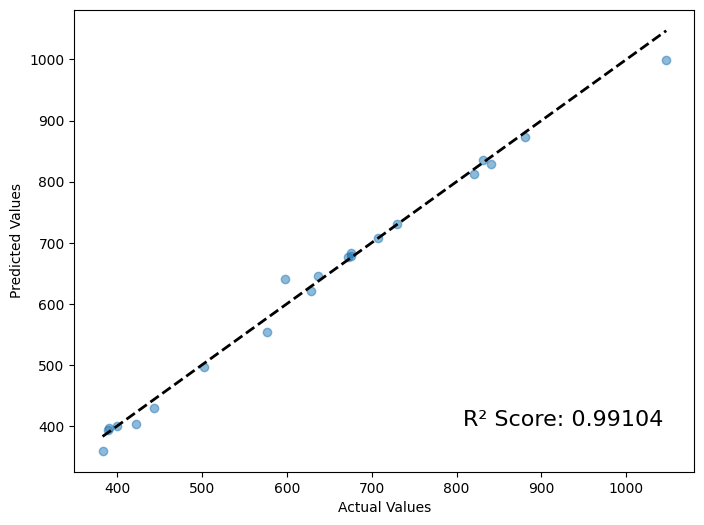

In [15]:
# Loop over each fold
fold = 1
for train_index, val_index in loo.split(X_train_combined):
    # Create a new instance of the model for each fold
    model = create_model(conv_filters=[32, 64], dense_neurons=128)
    
    X_train_part1, X_val_part1 = X_train_combined[train_index], X_train_combined[val_index]
    Y_train, Y_val = Y_train_normalized[train_index], Y_train_normalized[val_index]
    
    best_loss = float('inf')
    best_model_path = f"saved_models/model_fold_{fold}.keras"
    
    # Train the model
    print(X_train_part1.shape)
    for epoch in range(50):
        model.fit(X_train_part1, Y_train, epochs=1, validation_data=(X_val_part1, Y_val), verbose=0, shuffle=True)
        loss = model.evaluate(X_val_part1, Y_val, verbose=0)
        
        # Save the model with the best validation loss
        if loss < best_loss:
            best_loss = loss
            model.save(best_model_path)
    
    val_losses.append(best_loss)
    print(f"Fold {fold} - Best Validation Loss: {best_loss}")
    
    # Load the best model for the fold and predict
    best_model = tf.keras.models.load_model(best_model_path)
    prediction = best_model.predict(X_val_part1).flatten()
    val_predictions.extend(prediction)
    actual_values.extend(Y_val)
    
    fold += 1

# Calculate average validation loss
avg_val_loss = np.mean(val_losses)
print("Average Validation Loss:", avg_val_loss)

# Reverse normalization for predictions and actual values
Y_min = np.min(Y_train_combined)
Y_max = np.max(Y_train_combined)

val_predictions_original_scale = np.array(val_predictions).flatten() * (Y_max - Y_min) + Y_min
actual_values_original_scale = np.array(actual_values).flatten() * (Y_max - Y_min) + Y_min

# Calculate errors
errors = ((np.abs(actual_values_original_scale - val_predictions_original_scale)) / actual_values_original_scale) * 100 

# Create DataFrame
data = {
    'Actual Values': actual_values_original_scale,
    'Predicted Values': val_predictions_original_scale,
    'Absolute Error': errors
}
results_df = pd.DataFrame(data)

# Display DataFrame
print(results_df.head(28))  # Print first few rows of the DataFrame

# Calculate R² Score
r2 = r2_score(actual_values_original_scale, val_predictions_original_scale)
print("R² Score:", r2)

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values_original_scale, val_predictions_original_scale, alpha=0.5)
plt.plot([actual_values_original_scale.min(), actual_values_original_scale.max()], 
         [actual_values_original_scale.min(), actual_values_original_scale.max()], 
         'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(0.95, 0.1, f'R² Score: {r2:.5f}', fontsize=16, ha='right', transform=plt.gca().transAxes, backgroundcolor='white')
plt.grid(False)

plt.show()
